In [25]:
x= 30
if 10 <= x and x <= 30 :
    print('x is between 10 and 20.')

x is between 10 and 20.


In [3]:
x = 20
print(x)

20


In [ ]:
import numpy as nu
import matplotlib.pyplot as plt

def f(w0, w1):
    return w0**2 +2 * w0 * w1 + 3

In [4]:
import numpy as np
a = np.array([[5, 2], [3, 4]])
inva = np.linalg.inv(a)
print(inva)
print(inva.dot(a))

[[ 0.28571429 -0.14285714]
 [-0.21428571  0.35714286]]
[[ 1.00000000e+00  0.00000000e+00]
 [-1.66533454e-16  1.00000000e+00]]


(426, 640, 3)
(426, 640, 3)
(426, 640)


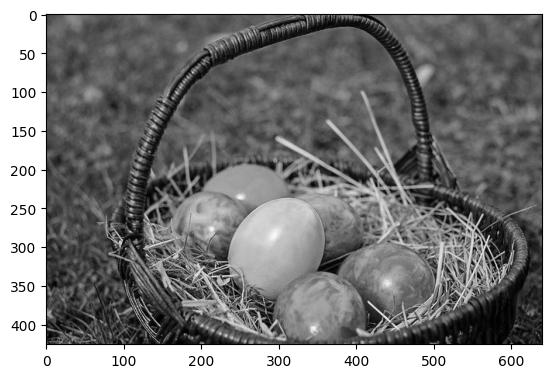

In [14]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

color_img = Image.open('fruits.jpg')


# 이미지 객체 -> numpy 행렬
color_pixel = np.array(color_img)
print(color_pixel.shape)

gray_pixel = color_pixel.copy()

for y in range(gray_pixel.shape[0]):
    for x in range(gray_pixel.shape[1]):
        gray_pixel[y, x] =np.mean(gray_pixel[y, x])

plt.imshow(gray_pixel)
plt.show
print(gray_pixel.shape)

# 흑백 이미지를 2차원으로 표현

gray_2d_pixel = gray_pixel[:, :, 0]
print(gray_2d_pixel.shape)

plt.imshow(gray_2d_pixel, 'gray')
plt.show()




(429, 640, 3)
(1, 429, 640, 3)
(1, 429, 640, 1)
(1, 9, 1, 1)
(1, 24, 36, 1)


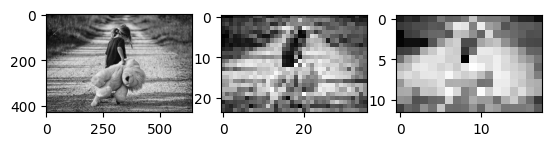

In [29]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ori_img = img.imread('D:\ml\girl.jpg')

ax1.imshow(ori_img)
print(ori_img.shape)

# convolution -> API
# API -> 4차원 (이미지 갯수, 세로, 가로, 채널)
# (429, 640, 3) -> (1, 429, 640, 3)
input_image = ori_img.reshape((1, ) + ori_img.shape)
input_image = input_image.astype(np.float32)    # 정수값 -> tf에서 float 처리하기에
print(input_image.shape)

ch1_input_image = input_image[:, :, :, 0 : 1]
print(ch1_input_image.shape)    # (1, 429, 640, 1)

filter = np.array([[[[1/9]], [[1/9]], [[1/9]],
                    [[1/9]], [[1/9]], [[1/9]],
                    [[1/9]], [[1/9]], [[1/9]]]])

print(filter.shape)

conv2d = tf.nn.conv2d(
    ch1_input_image, 
    filter,
    strides = [1, 18, 18, 1],
    padding = 'VALID'   # 패딩을 고려x, 원래값으로
)

conv2d_result = conv2d.numpy()
print(conv2d_result.shape)

t_img = conv2d_result[0, :, :, :]
ax2.imshow(t_img, cmap = 'gray')

# pooling
pool = tf.nn.max_pool(
    conv2d_result,
    ksize = [1, 2, 2, 1],
    strides = [1, 2, 2, 1],
    padding = 'VALID'
)
pool_result = pool.numpy()
t_img = pool_result[0, :, :, :]
ax3.imshow(t_img, cmap = 'gray')

Found 2004 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)
[1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]


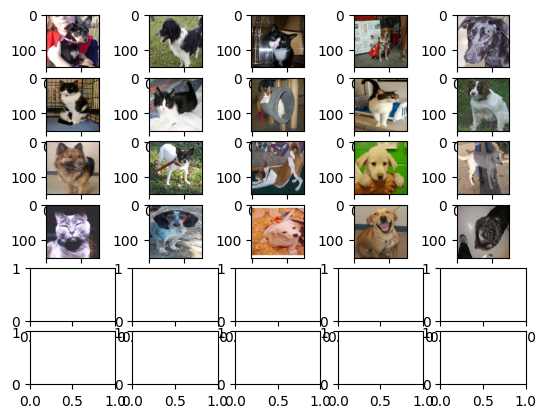

In [23]:
# Use ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 위치
train_dir = './cat_dog_small/train'
validation_dir = './cat_dog_small/validation'

# 생성
train_datagen = ImageDataGenerator(rescale = 1/255) # 0 ~ 1까지 정규화
validation_datagen = ImageDataGenerator(rescale = 1/255)

# 설정
train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes = ['cats', 'dogs'],  # 타겟, 레이블
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes = ['cats', 'dogs'],  # 타겟, 레이블
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)
# generator 동작확인

# 한번에 30개 이미지를 가져와서 

fig = plt.figure()
axs = []

for i in range(30):
    axs.append(fig.add_subplot(6, 5, i+1))

for data_batch, label_batch in train_generator:
    print(data_batch.shape)
   
    for idx, img_data in enumerate(data_batch):
        axs[idx].imshow(img_data)
    print(label_batch.shape)
    print(label_batch)
     
    break

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential  # model, box
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# model 생성
model = Sequential()

# model layer 추가

#### 1
model.add(Conv2D(
    filters = 32,
    kernel_size = (3, 3),
    strides = (1, 1),
    padding = 'valid',
    activation = 'relu',
    input_shape = (150, 150, 3)
))
model.add(MaxPooling2D(
    pool_size = (2, 2)
))

#### 2
model.add(Conv2D(
    filters = 64,
    kernel_size = (3, 3),
    strides = (1, 1),
    padding = 'valid',
    activation = 'relu',
    input_shape = (150, 150, 3)
))
model.add(MaxPooling2D(
    pool_size = (2, 2)
))

#########
model.add(Flatten())
model.add(Dense(
    units = 1,
    activation = 'sigmoid'
))

model.summary()

model.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 1
)


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 82944)             0         
                                                                 
 dense_11 (Dense)            (None, 1)               